In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import os
%cd /content/drive/MyDrive/graduation_project/FPTT-on-ANN/RNN/lstm-master/final_version/
!pwd
!ls

/content/drive/MyDrive/graduation_project/FPTT-on-ANN/RNN/lstm-master/final_version
/content/drive/MyDrive/graduation_project/FPTT-on-ANN/RNN/lstm-master/final_version
lstm_no_b.py  parameters_00.py	__pycache__  train.ipynb
lstm.py       parameters_01.py	tmp.ipynb


In [3]:
import numpy as np
import copy
import matplotlib.pyplot as plt
# import lstm as model
import lstm as model
import parameters_01 as pa

In [4]:
# !python lstm.py

# Load & Preprocess Data

In [5]:
def LoadData(DirName,limit = 500):
    data = list();
    count = 0;
    with open(DirName) as f:
        for line in f:
            if count<limit:
                new_line = np.array(line.split(','))
                new_line = new_line.astype(np.float32)
                data.append(new_line)
                count += 1
    data = np.asarray(data)

    return data[:,0],data[:,1:]

NoTrain = 60000
NoTest = 10000
Y_train,x_train = LoadData("../lab1-solution/data/mnist_train.csv", NoTrain)
Y_test,x_test = LoadData("../lab1-solution/data/mnist_test.csv", NoTest)

print(f"Test set size: {x_test.shape[0]} x {x_test.shape[1]}")
print(f"Train set size: {x_train.shape[0]} x {x_train.shape[1]}")

Test set size: 10000 x 784
Train set size: 60000 x 784


In [6]:
# x_train_st = x_train/255
# x_test_st = x_test/255

In [7]:
# x_train_st[0]

In [8]:
x_train_st = (x_train-np.average(x_train))/np.std(x_train)
x_test_st = (x_test-np.average(x_train))/np.std(x_train)

In [9]:
# One-hot encoding train and test sets labels
y_train = np.zeros((Y_train.size, int(Y_train.max()) + 1))
# y_train = np.zeros((Y_train.size, 10))
y_train[np.arange(Y_train.size),Y_train.astype(int)] = 1.0;



print(f"Your decimal label is {Y_train[0]:.0f} and your one-hot encoded label is {y_train[0,:]}")
print(f"Correct decimal label is 5 and correct one-hot encoded label is [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]")

Your decimal label is 5 and your one-hot encoded label is [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
Correct decimal label is 5 and correct one-hot encoded label is [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [10]:
y_test  = np.zeros((Y_test.size, int(Y_test.max()) + 1))
# y_test  = np.zeros((Y_test.size, 10))
y_test[np.arange(Y_test.size),Y_test.astype(int)] = 1.0;

In [11]:
X = x_train_st
Y = y_train

In [12]:
y_test.shape

(10000, 10)

# Loss & Accuracy Definition

In [13]:
def cross_entropy(y_pred,y):
    """ Input Parameters: y_pred, y : array of float  Returns: c : float """

    # Compute loss
    c = (abs(np.log(abs(y_pred)))*y).sum(axis=1).sum()

    print(y_pred, y, c)
    return c


def labeling(x):
    # Set the label with the max probability to '1' and the rest to 0
    label = np.zeros((x.shape[0],Y.shape[1]))
    label[np.arange(x.shape[0]),x.argmax(axis=1)] = 1
    return label

def accuracy(y_pred,y):
    # Calculate the accuracy along the rows, averaging the results over the number of samples.
    acc = np.all(y_pred==y,axis=1).mean()
    return acc

# Instantiate Model

In [14]:
N_l = 128  # number of neurons in hidden layer

layers = np.array([1] +[N_l]+[Y.shape[1]]) #
print(layers)

[  1 128  10]


In [15]:
np.random.seed(seed=0)

In [16]:
# param = model.LstmParam(layers, pa.saved_params, True)
param = model.LstmParam(layers)
print(param.l1_wg)
print(param.l1_wg_diff)

[[ 0.00862909  0.03804047  0.01816617 ... -0.08499544 -0.03507695
   0.02831495]
 [-0.03710939  0.02086238 -0.01259203 ... -0.07364121  0.00922641
   0.0149334 ]
 [ 0.08165959 -0.03674347 -0.04581543 ...  0.05670415  0.07227404
   0.05577726]
 ...
 [-0.02938182 -0.03493803 -0.07455167 ... -0.07899544 -0.0076339
   0.06084169]
 [ 0.08658275 -0.07437803 -0.07302671 ... -0.02045291 -0.08632061
   0.059842  ]
 [-0.02951533  0.06813321  0.03719318 ... -0.016658    0.0133768
  -0.03443887]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [17]:
# def get_xt(p, step, T, inputs):
#     start = p*step
#     end = (p+1)*step
#     if (end >= T): end=T

#     x = inputs[ start : end ]
#     return x, start, end

In [18]:
seq_len = 784
k = 28 # p
step = seq_len / k


(60000, 784)


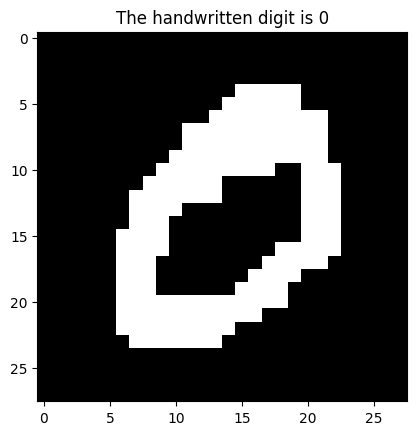

In [19]:
print(X.shape)
sample = 1;  # index of the image we want to show

plt.title(f'The handwritten digit is {Y_train[sample]:.0f}')

# Reshape the array into 28 x 28 array (2-dimensional array)
pixels = x_train[sample,:].reshape((28, 28))
plt.imshow(pixels, cmap='gray',vmin=0,vmax=1.0)
plt.show()

In [20]:
# print(X[0:2,200:400])

In [21]:
bsz = int(10)

M = model.Lstm(784, bsz, layers, param)

In [22]:
# print(Model.state.xc.shape)
# print(Model.state.Y_hat.shape)

In [23]:
t1 = 0
t2 = 630
t3 = 783

# print(t1, Model.state.Y_hat[t1])
# print(t2, Model.state.Y_hat[t2])
# print(t3, Model.state.Y_hat[t3])

In [24]:
for t in range(784):
    M.state.forward(t, x_test_st[0:bsz, t:(t+1)] )
    # if t== (200||400||):
    #     print(t, Model.state.Y_hat[t])


In [25]:
# print(t1, Model.state.xc[t1][0])
# print(t1, Model.state.l1_g[t1][0])
# print(t1, np.tanh(Model.param.l1_bg) )

# print(t1, Model.state.Y_hat[t1][0])
# print(t2, Model.state.Y_hat[t2][0])
# print(t3, Model.state.Y_hat[t3][0])

# print(Model.state.h_prev

In [26]:
# print(Model.state.Y_hat.shape)

In [27]:
for i in range(bsz):
    print(M.state.Y_hat[783][i])


# len(Model.state.Y_hat[783][1])

[-2.16242866 -2.30769693 -2.29959255 -2.30410948 -2.35549076 -2.32771782
 -2.35054576 -2.29014972 -2.29653642 -2.34573271]
[-2.16242866 -2.30769693 -2.29959255 -2.30410948 -2.35549076 -2.32771782
 -2.35054576 -2.29014972 -2.29653642 -2.34573271]
[-2.16242866 -2.30769693 -2.29959255 -2.30410948 -2.35549076 -2.32771782
 -2.35054576 -2.29014972 -2.29653642 -2.34573271]
[-2.16242866 -2.30769693 -2.29959255 -2.30410948 -2.35549076 -2.32771782
 -2.35054576 -2.29014972 -2.29653642 -2.34573271]
[-2.16242866 -2.30769693 -2.29959255 -2.30410948 -2.35549076 -2.32771782
 -2.35054576 -2.29014972 -2.29653642 -2.34573271]
[-2.16242866 -2.30769693 -2.29959255 -2.30410948 -2.35549076 -2.32771782
 -2.35054576 -2.29014972 -2.29653642 -2.34573271]
[-2.16242866 -2.30769693 -2.29959255 -2.30410948 -2.35549076 -2.32771782
 -2.35054576 -2.29014972 -2.29653642 -2.34573271]
[-2.16242866 -2.30769693 -2.29959255 -2.30410948 -2.35549076 -2.32771782
 -2.35054576 -2.29014972 -2.29653642 -2.34573271]
[-2.16242866 -2.

In [28]:
for i in range(bsz):
    print(np.argmax(y_test[i]), np.argmax(M.state.Y_hat[783][i]))


7 0
2 0
1 0
0 0
4 0
1 0
4 0
9 0
5 0
9 0


In [29]:
# print(t1, Model.state.l1_s[t1][0])
# print(t1, Model.state.l1_h[t1][0])

In [30]:
# kk = np.zeros((200,128))
# print(Model.param.l1_bi)

# g= np.tanh(Model.param.l1_bg)
# i= model.sigmoid(Model.param.l1_bi)
# f= model.sigmoid(Model.param.l1_bf)
# o= model.sigmoid(Model.param.l1_bo)


# oo = i*g
# print(oo)

In [31]:
# Model.state.l2_h.shape

In [32]:
def smax(x):
    """ Input Parameters: x : input: array(n x p) : n samples by p dimensions : p=10 for MNIST (because we have 0-9 digits)  Returns: softmax(x) : float or array """


    e_x = np.exp(x - np.max(x))  # Subtracting the maximum value for numerical stability
    return e_x / e_x.sum(axis=1,keepdims= True)
    # return e_x / e_x.sum(axis=0)

In [35]:
mean_train_loss_list = list()
train_acc_list = list()


# Initialize the batch size, the number of epochs, and the learning rate
n_samples = 3 #X.shape[0]

batch_size = 1
epochs = 40
lr = 0.008
alpha = 0.1

# Initialize the weights
# weights = init_weights(layers)
# w_g, w_lbd, w_rm = init_weights_derivatives(layers, weights)

# Q: predicted label distribution of last training epoch --> used to make auxiliary loss (oracle loss)
Q = np.zeros_like(Y)

target = np.zeros((batch_size, 10))


# Epoch for loop
for epoch in range(epochs):

    # if (epoch==50) or (epoch==75) or (epoch==90):
        # lr *= 0.1

    # Initialize the layers
    # ins, h, o = init_layer(layers,batch_size)
    # initiate hidden states for current batch
    Model = model.Lstm(seq_len, batch_size, layers, param)

    # Initialize the training loss and accuracy for each epoch
    train_loss = 0
    train_acc = 0

    # Create a random permutation for shuffling
    shuffle = np.random.permutation(n_samples)
    print(shuffle)


    # Shuffle dataset and create mini-batches for each epoch
    X_batches = np.array_split(X[shuffle],n_samples/batch_size)
    Y_batches = np.array_split(Y[shuffle],n_samples/batch_size)
    Q_batches = np.array_split(Q[shuffle],n_samples/batch_size)
    target = np.empty_like(Q_batches)

    # print(Y_batches)

    # Mini-batch for loop
    for b in range(int(n_samples/batch_size)):


        for p in range(28):



            for t in range (28):
                cnt = p*28 + t
                Model.state.forward(cnt, X_batches[b][:, cnt:(cnt+1)] )

            # print(Model.state.l1_h[cnt])
            # if(Model.state.l1_h[cnt][0].any()!=Model.state.l1_h[cnt][1].any()):
                # print("Diff", b, p)

            # print("batch, part", b, p)
            # print("weights:i", Model.param.l1_wi)
            # print(Model.state.l2_h[cnt], smax(Model.state.l2_h[cnt]), Model.state.Y_hat[cnt])

            # to make target for cross entropy and divergence term
            # if epoch == 0:
            #     beta = 1
            # else:
            beta = (cnt+1)/seq_len

            target[b] = beta*(Y_batches[b]) + (1-beta)*Q_batches[b]

            # backwards - to calculate the gradients w.r.t. cross entropy loss and auxiliary loss
            Model.backward(batch_size, cnt, target[b], trunc_h=27, trunc_s=27)

            # update the weights by gradients obtained
            Model.param.apply_diff_fptt(lr, alpha)


        Q[shuffle[batch_size*b:batch_size*(b+1)]] = Q_batches[b]

        # train_loss += cross_entropy(Model.state.Y_hat[seq_len-1],Y_batches[b])
        train_loss += cross_entropy(Model.state.Y_hat[seq_len-1], Y_batches[b])
        train_acc += accuracy(labeling(Model.state.Y_hat[seq_len-1]),Y_batches[b])


    mean_train_loss = train_loss/n_samples
    mean_train_loss_list.append(mean_train_loss)
    train_acc = (train_acc/len(X_batches))
    train_acc_list.append(train_acc)




    print(f"Epoch {epoch+1}: train_loss = {mean_train_loss:.3f} | train_acc = {train_acc:.3f} " )



[1 2 0]
[[-1.83050576 -2.45731435 -2.44867112 -2.45418243 -2.13303835 -2.08038199
  -2.49215474 -2.4405952  -2.46300266 -2.48551682]] [[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]] 0.6045923005844303
[[-1.83677036 -2.46517569 -2.45639117 -2.46180442 -2.07757825 -2.09009904
  -2.49904173 -2.44815163 -2.47199282 -2.49242994]] [[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]] 0.7312029124969724
[[-1.84967934 -2.47259556 -2.46418497 -2.4700319  -2.08259071 -2.03343497
  -2.50693869 -2.45532026 -2.47911778 -2.50074206]] [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]] 0.7097264670005013
Epoch 1: train_loss = 0.682 | train_acc = 0.333 
[1 2 0]
[[-1.78860172 -2.4847713  -2.47576859 -2.48143578 -2.09605396 -2.04315
  -2.51821597 -2.46802814 -2.49297905 -2.51131555]] [[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]] 0.581434153410965
[[-1.7956183  -2.49300164 -2.48383201 -2.48939287 -2.03949124 -2.0536841
  -2.52544089 -2.47594102 -2.50235149 -2.51856605]] [[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]] 0.7127003857934359
[[-1.80950178 -2.50076026 -2.49194944 -2.4979

KeyboardInterrupt: ignored

In [ ]:
print(Model.param.l1_wi)

In [ ]:
fig,ax = plt.subplots(1,2,figsize=(15,5))

ax[0].plot(mean_train_loss_list,label="Train loss")
# ax[0].plot(mean_test_loss_list,label="Test loss")
ax[0].legend()
ax[0].set_xlabel("Epoch")
ax[0].set_ylabel("Loss")
ax[0].grid()

ax[1].plot(train_acc_list,label="Train accuracy")
# ax[1].plot(test_acc_list,label="Test accuracy")
ax[1].legend()
ax[1].set_xlabel("Epoch")
ax[1].set_ylabel("Accuracy")
ax[1].grid()